1. 지역별 총인구수 Top5

In [4]:
import pandas as pd

data = pd.read_csv('../data/인구현황.csv')
print(data.shape)
print(type(data))

(18, 8)
<class 'pandas.core.frame.DataFrame'>


In [14]:
data_ex = data[data['행정기관'] != '전국']
data2 = data_ex[['행정기관', '총인구수']].sort_values(by='총인구수', ascending=False)

data2.head()

,행정기관,총인구수
9,경기도,13694685
1,서울특별시,9331828
2,부산광역시,3266598
16,경상남도,3228380
4,인천광역시,3021010


1-1. 지역별 총인구수 plot

In [9]:
%matplotlib inline

In [20]:
# font name을 알고 있다면 생략가능
#한글폰트 path 설정
font_path = 'C:\\Windows\\Fonts\\malgun.ttf'
#font의 파일정보로 font name 을 알아내기
font_name = fm.FontProperties(fname=font_path).get_name()
print(font_name)

# matplotlib의 rc(run command) 함수를 사용해서 font name(Malgun Gothic) 설정
matplotlib.rc('font',family=font_name)

Malgun Gothic


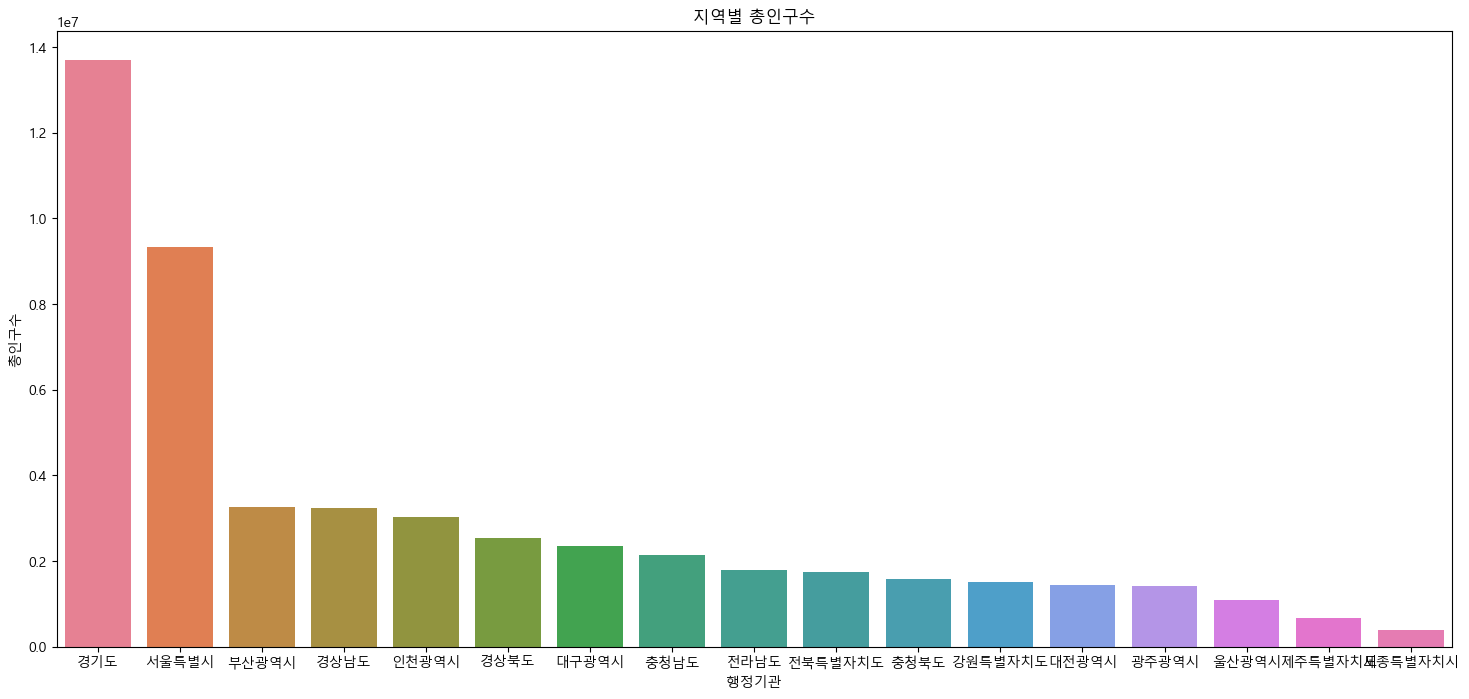

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

figure,axes = plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(18,8)
plot1 = sns.barplot(data=data_ex.sort_values(by='총인구수',ascending=False),x='행정기관',y='총인구수',ax=axes, hue='행정기관')
plot1.set_title('지역별 총인구수')
plt.show()

2. 세대당 인구수 높은 지역 Top5

In [34]:
data3 = data_ex[['행정기관','세대당 인구']].sort_values(by='세대당 인구', ascending=False).reset_index(drop=True)
data3.head()

,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14


2-1. 지역별 세대당 인구 Plot

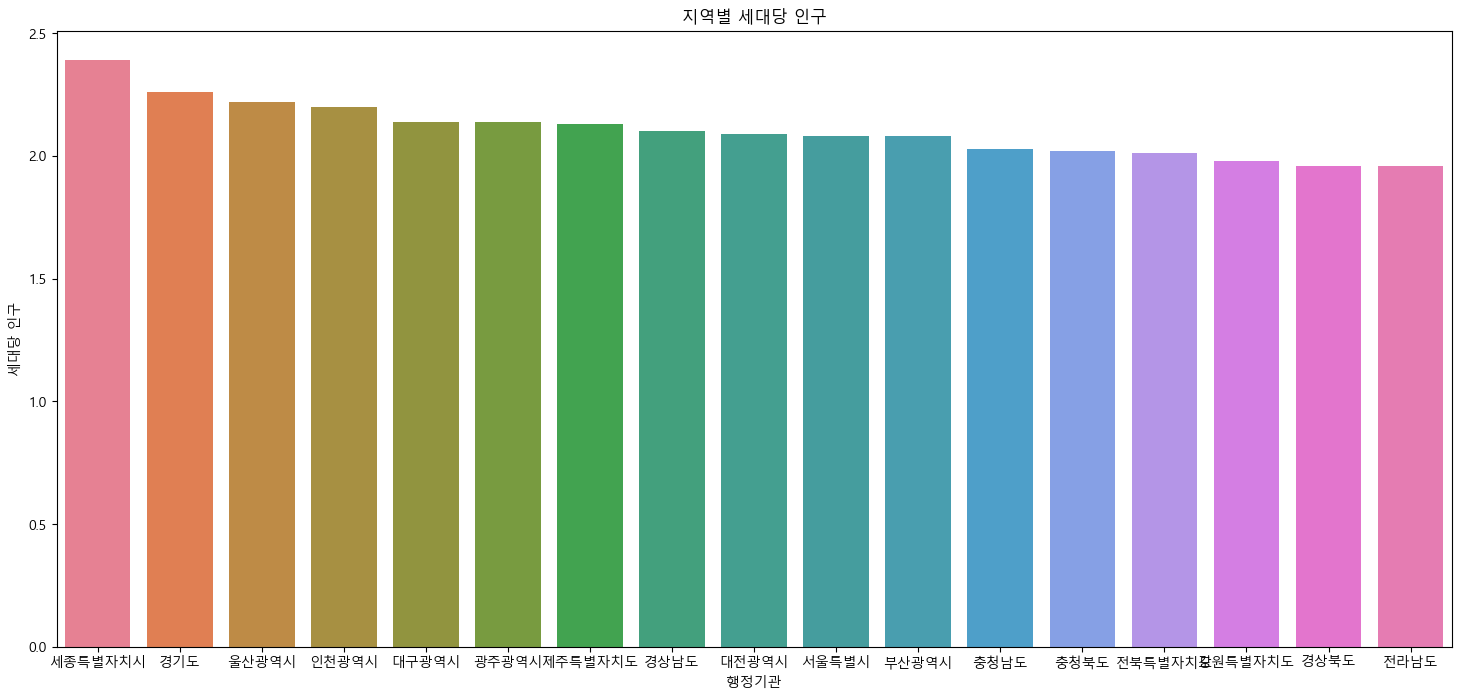

In [ ]:
figure,axes2 = plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(18,8)

plot2 = sns.barplot(data=data_ex.sort_values(by='세대당 인구',ascending=False),x='행정기관',y='세대당 인구',ax=axes2, hue='행정기관')
plot2.set_title('지역별 세대당 인구')
plt.show()

3. 남녀 비율 분석

In [45]:
data4 = data_ex[['행정기관','남여 비율']].sort_values(by='남여 비율', ascending=False).reset_index(drop=True)
data4

,행정기관,남여 비율
0,울산광역시,1.06
1,충청남도,1.05
2,충청북도,1.04
3,전라남도,1.02
4,경상북도,1.02
5,경상남도,1.02
6,강원특별자치도,1.01
7,경기도,1.01
8,제주특별자치도,1.00
9,인천광역시,1.00


3-1. 남녀 비율 분석 Plot

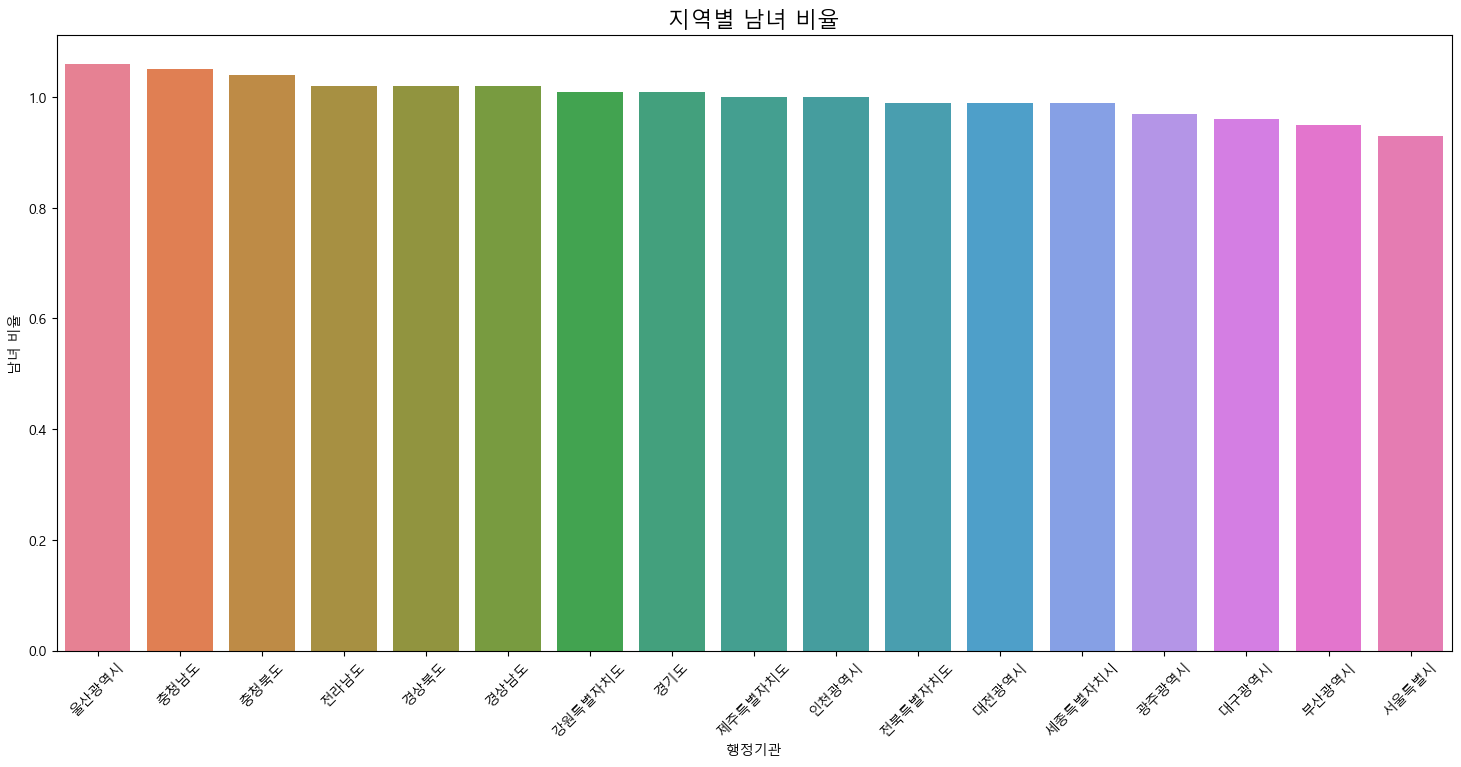

In [56]:
figure,axes3 = plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(18,8)
# seaborn의 barplot() 함수 호출하기 - 행정구역과 총인구수

plot3 = sns.barplot(data=data_ex.sort_values(by='남여 비율',ascending=False),x='행정기관',y='남여 비율',ax=axes3, hue='행정기관')
plot3.tick_params(axis='x', rotation=45)
plot3.set_title('지역별 남녀 비율', fontsize=16)
plot3.set_xlabel('행정기관')
plot3.set_ylabel('남녀 비율')
plt.show()

4. 남자초과/여자초과 분석

In [ ]:
data5 = data_ex[['행정기관','남여 비율']].copy()
def get_gender_status(ratio):
    if ratio > 1:    
        return '남초'
    elif ratio < 1:  
        return '여초'
    else:               
        return '동일'
data5['남초여초'] = data5['남여 비율'].apply(get_gender_status)
data5

,행정기관,남여 비율,남초여초
1,서울특별시,0.93,여초
2,부산광역시,0.95,여초
3,대구광역시,0.96,여초
4,인천광역시,1.00,동일
5,광주광역시,0.97,여초
6,대전광역시,0.99,여초
7,울산광역시,1.06,남초
8,세종특별자치시,0.99,여초
9,경기도,1.01,남초
10,강원특별자치도,1.01,남초


5. 세대당 인구 평균보다 높은 지역

In [ ]:
avg_value = data_ex['세대당 인구'].mean()
print(f"전국 평균 세대당 인구수: {avg_value:.2f}명\n")
data_avg = data_ex['세대당 인구'] > avg_value

data6 = data_ex.loc[data_avg, ['행정기관', '세대당 인구']]
data6 = data6.sort_values(by='세대당 인구', ascending=False).reset_index(drop=True)
data6

전국 평균 세대당 인구수: 2.11명



,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14
5,광주광역시,2.14
6,제주특별자치도,2.13


5-1. 남초 vs 여초 개수 Plot  ( seaborn의 countplot )
         지역별 세대수 Plot ( seaborn의 barplot )

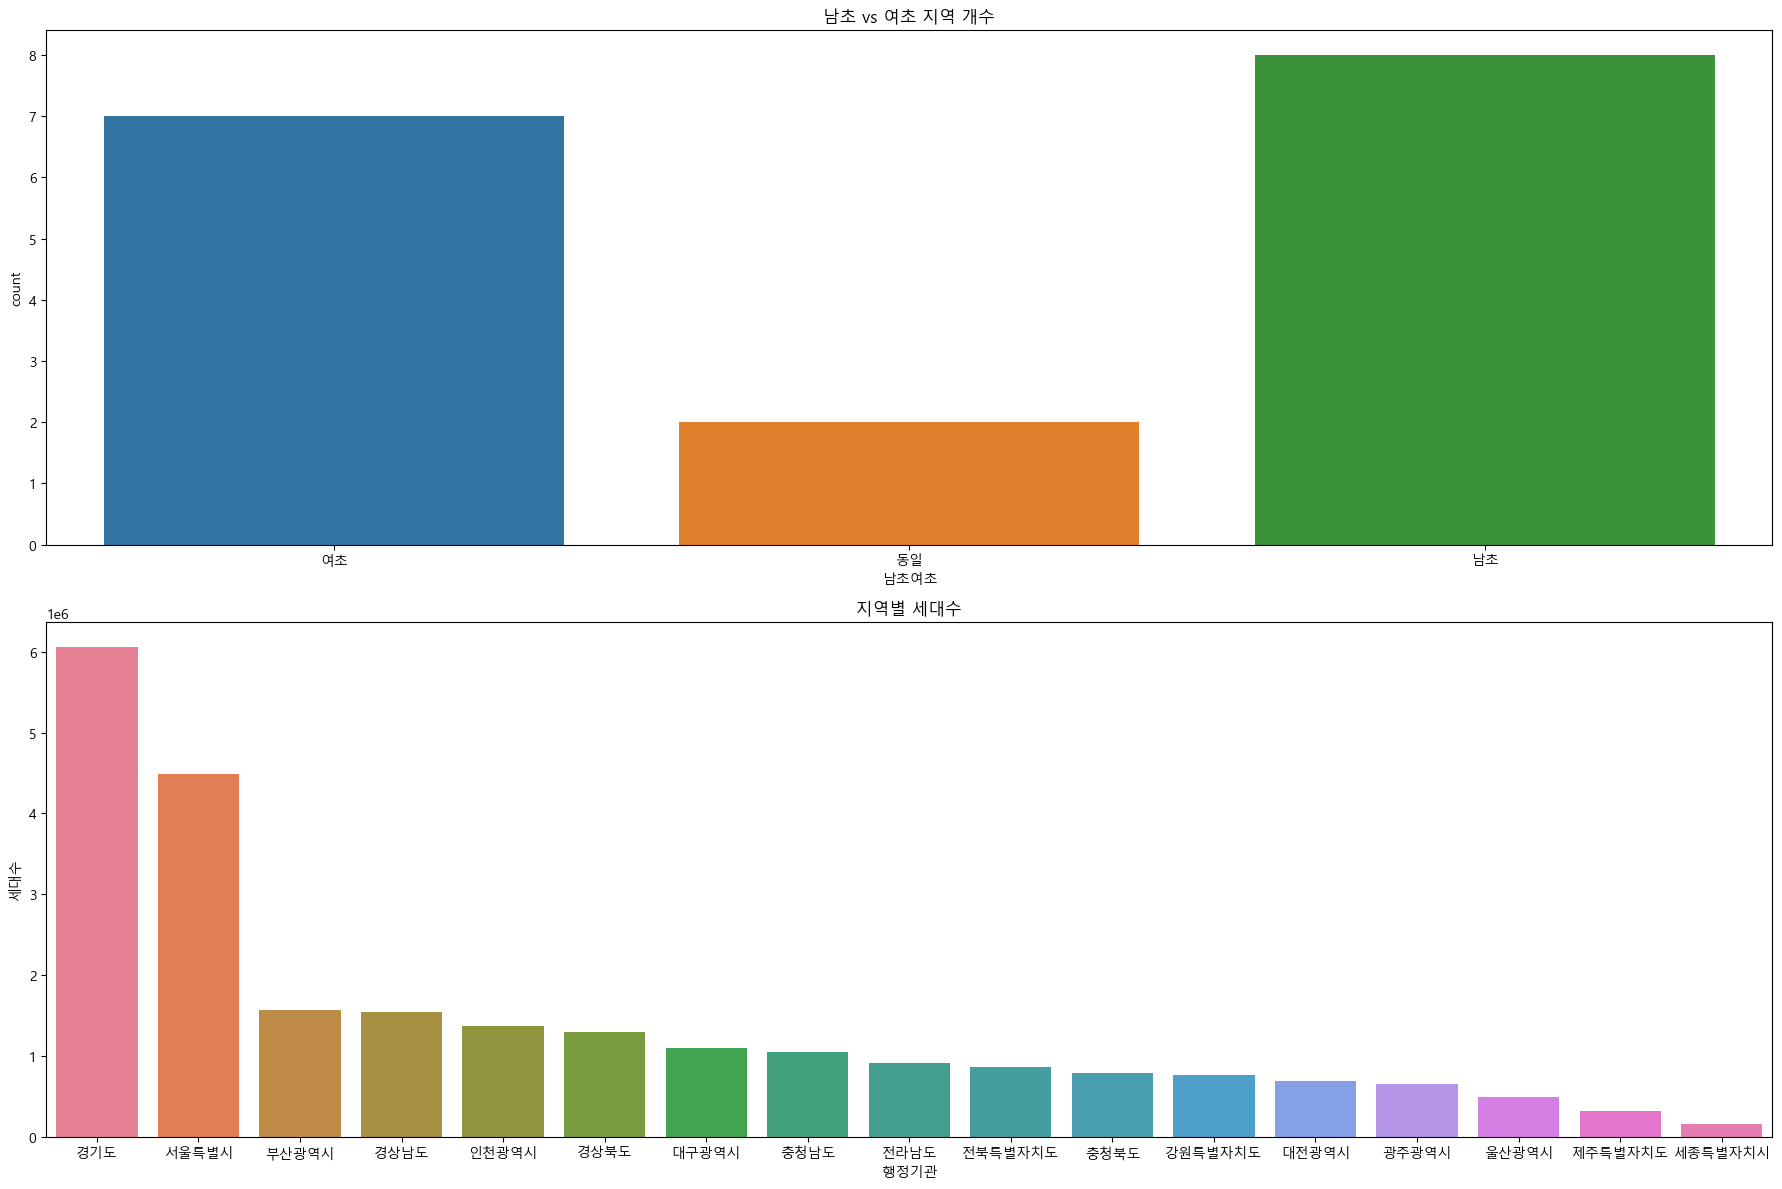

In [76]:
figure,(ax1,ax2) = plt.subplots(nrows=2,ncols=1)
figure.set_size_inches(18,12)

plot4 = sns.countplot(data=data5,x='남초여초',ax=ax1, hue='남초여초')
plot4.set_title('남초 vs 여초 지역 개수')

plot5 = sns.barplot(data=data_ex.sort_values(by='세대수',ascending=False),x='행정기관',y='세대수',ax=ax2, hue='행정기관')
plot5.set_title('지역별 세대수')
plt.tight_layout()
plt.show()